In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# read csv
data = pd.read_csv("datasets/all.csv")
# convert dates
data["Hour"] = data["Hour"].astype("str")
data["DateTime"] = pd.to_datetime(data["Date"] + " " + data["Hour"] + ":00:00")
del data["Hour"]
del data["Date"]
# set datetime index
data.index = pd.DatetimeIndex(data.DateTime)
# fix no2 col
data = data[data['NO2-ug-per-m3'].apply(lambda x: x.isnumeric())]
data["NO2"] = data["NO2-ug-per-m3"].astype("int")
del data["NO2-ug-per-m3"]
# fix temp col
data = data[data["air_temp_deg_c"] > -500]
data.head()

,Cars-Direction-1,Cars-Direction-2,Cars-Total,Day-Of-Week,wind_meters_per_second,rain_millimeters,did_it_rain,air_temp_deg_c,relative_humidity_percent,e5,e10,diesel,DateTime,NO2
DateTime,,,,,,,,,,,,,,
2019-01-02 04:00:00,11,8,19,3,7.5,0.0,0,3.5,67.0,1.399000,1.379000,1.289000,2019-01-02 04:00:00,11
2019-01-02 05:00:00,30,40,70,3,6.6,0.0,0,3.8,62.0,1.404529,1.379118,1.265706,2019-01-02 05:00:00,25
2019-01-02 06:00:00,137,76,213,3,9.1,0.0,0,3.9,57.0,1.394352,1.372944,1.248014,2019-01-02 06:00:00,65
2019-01-02 07:00:00,266,198,464,3,9.8,0.0,0,3.9,52.0,1.383038,1.355538,1.234577,2019-01-02 07:00:00,71
2019-01-02 08:00:00,394,252,646,3,9.9,0.0,0,3.7,54.0,1.373588,1.347706,1.228059,2019-01-02 08:00:00,70


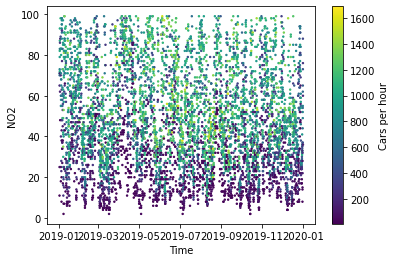

'(Color: cars total) NO2 correlates with cars'

In [4]:
plt.figure()
plt.scatter(data["DateTime"], data["NO2"], s=2, c=data["Cars-Total"])
plt.xlabel("Time")
plt.ylabel("NO2")
cb = plt.colorbar()
cb.set_label("Cars per hour")
plt.show()
display("(Color: cars total) NO2 correlates with cars")

<ipython-input-5-3d6144e11770>:19: RuntimeWarning: invalid value encountered in true_divide
  cars = cars / cars_sample_counter
<ipython-input-5-3d6144e11770>:20: RuntimeWarning: invalid value encountered in true_divide
  no2 = no2 / cars_sample_counter


<Figure size 432x288 with 0 Axes>

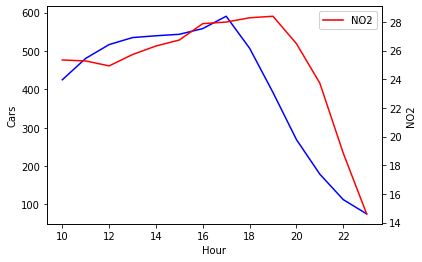

In [5]:
# NO2 in relation to hourly cars
def cars_hourly(data):
    # array for 24 hours for "Cars-Total"
    cars = np.zeros(24)
    cars_sample_counter = np.zeros(24)
    # array for 24 hours for "NO2"
    no2 = np.zeros(24)
    cars_sample_counter = np.zeros(24)
    # iterate over data and put NO2 and Cars-Total in arrays
    for i in range(len(data)):
        # get hour from column "DateTime" like this  "2019-01-02 04:00:00"
        hour = data.iloc[i]["DateTime"].hour
        cars[hour] += data["Cars-Total"][i]
        cars_sample_counter[hour] += 1
        no2[hour] += data["NO2"][i]
        cars_sample_counter[hour] += 1

    # to erase the different sample sizes we divide by the sample size
    cars = cars / cars_sample_counter
    no2 = no2 / cars_sample_counter

    # plot "cars" and "no2" as lines in ax1 and ax2 but in one graph
    # "no2" is red
    plt.figure()
    fig, ax1 = plt.subplots()
    ax1.plot(cars, color="blue", label="Cars")
    ax1.set_xlabel("Hour")
    ax1.set_ylabel("Cars")
    ax1.legend()
    ax2 = ax1.twinx()
    ax2.plot(no2, color="red", label="NO2")
    ax2.set_ylabel("NO2")
    ax2.legend()
    plt.show()

cars_hourly(data)


<Figure size 432x288 with 0 Axes>

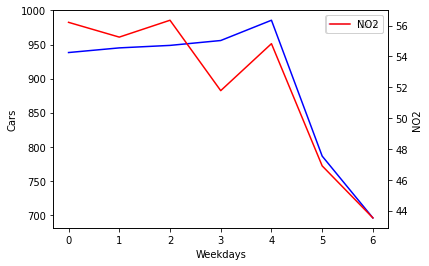

In [13]:
# NO2 in relation to cars on week days
def cars_weekdays(data):
    # array for 7 days of the week
    cars = np.zeros(7)
    cars_sample_counter = np.zeros(7)
    # array for 7 days of the week
    no2 = np.zeros(7)
    no2_sample_counter = np.zeros(7)
    # iterate over data and put NO2 and Cars-Total in arrays
    for i in range(len(data)):
        # get weekday from column "DateTime" like this  "2019-01-02 04:00:00"
        weekday = data.iloc[i]["DateTime"].weekday()
        cars[weekday] += data["Cars-Total"][i]
        cars_sample_counter[weekday] += 1
        no2[weekday] += data["NO2"][i]
        no2_sample_counter[weekday] += 1

    # to erase the different sample sizes we divide by the sample size
    cars = cars / cars_sample_counter
    no2 = no2 / no2_sample_counter

    # plot "cars" and "no2" as lines in ax1 and ax2 but in one graph
    # "no2" is red
    plt.figure()
    fig, ax1 = plt.subplots()
    ax1.plot(cars, color="blue", label="Cars")
    ax1.set_xlabel("Weekdays")
    ax1.set_ylabel("Cars")
    ax1.legend()
    ax2 = ax1.twinx()
    ax2.plot(no2, color="red", label="NO2")
    ax2.set_ylabel("NO2")
    ax2.legend()
    plt.show()
cars_weekdays(data)


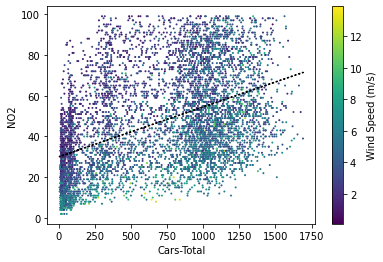

'Color: Wind speed (Strong wind -> Less NO2 measured)'

In [7]:
plt.figure()
plt.scatter(data["Cars-Total"], data["NO2"], s=1, c=data["wind_meters_per_second"])
m,c = np.polyfit(data["Cars-Total"], data["NO2"], 1)
plt.plot(data["Cars-Total"], m*data["Cars-Total"]+c, c="black", linestyle="dotted")
plt.xlabel("Cars-Total")
plt.ylabel("NO2")
cb = plt.colorbar()
cb.set_label("Wind Speed (m/s)")
plt.show()
display("Color: Wind speed (Strong wind -> Less NO2 measured)")

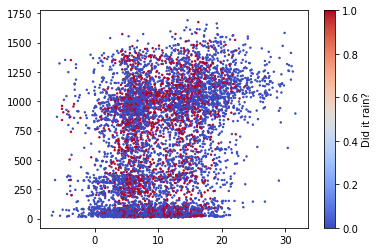

'(Color: red=rain, blue=dry) Car traffic does not seem to be correlated with temperature'

In [8]:
plt.figure()
plt.scatter(data["air_temp_deg_c"], data["Cars-Total"], s=2, c=data["did_it_rain"], cmap="coolwarm")
cb = plt.colorbar()
cb.set_label("Did it rain?")
plt.show()
display("(Color: red=rain, blue=dry) Car traffic does not seem to be correlated with temperature")

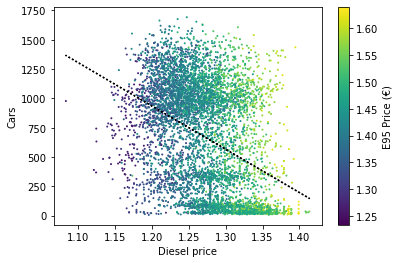

'(Color: gas price) Cheaper diesel fuel means more traffic'

In [9]:
plt.figure()
plt.scatter(data["diesel"], data["Cars-Total"], s=1, c=data["e5"])
m,c = np.polyfit(data["diesel"], data["Cars-Total"], 1)
plt.plot(data["diesel"], m*data["diesel"]+c, c="black", linestyle="dotted")
plt.xlabel("Diesel price")
plt.ylabel("Cars")
cb = plt.colorbar()
cb.set_label("E95 Price (€)")
plt.show()
display("(Color: gas price) Cheaper diesel fuel means more traffic")

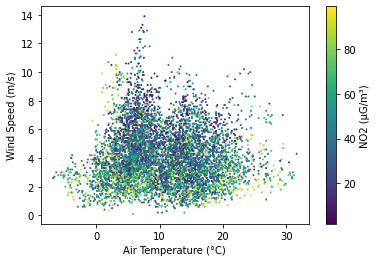

In [10]:
plt.figure()
plt.scatter(data["air_temp_deg_c"], data["wind_meters_per_second"], s=1, c=data["NO2"])
plt.xlabel("Air Temperature (°C)")
plt.ylabel("Wind Speed (m/s)")
cb = plt.colorbar()
cb.set_label("NO2 (µG/m³)")
plt.show()

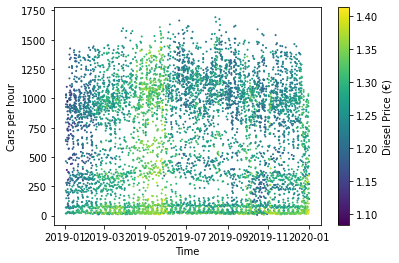

In [11]:
plt.figure()
plt.scatter(data["DateTime"],data["Cars-Total"], c=data["diesel"], s=1)
plt.xlabel("Time")
plt.ylabel("Cars per hour")
cb = plt.colorbar()
cb.set_label("Diesel Price (€)")
plt.show()